In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Statistical Analysis of Conway's Game of Life

In this notebook I'm going to analyze some important properties of Conway's game of life.

In [12]:
samples = np.loadtxt("data/totalVStime.dat")

gens = len(samples[0])


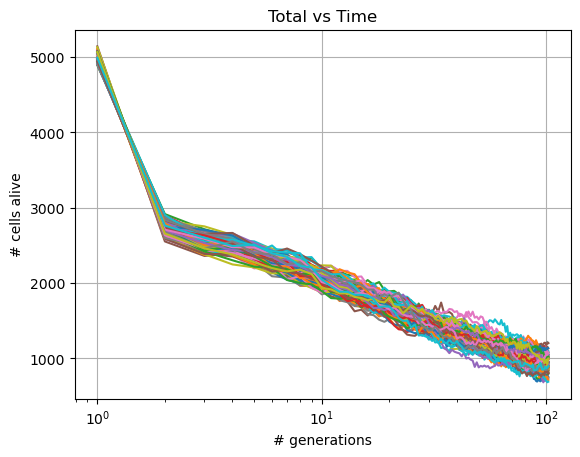

In [21]:
for i in range(gens):
    plt.plot(range(1,len(samples)+1) , samples[:,i])

plt.xlabel("# generations")
plt.ylabel("# cells alive")

plt.grid()

plt.title("Total vs Time")


plt.xscale('log')

plt.show()